# Parte 1

## Introducción:
El siguiente informe corresponde al trabajo realizado para la tarea 1 del curso Optimización para el Análisis de Datos, tarea en la cual se estudiará el problema de la inasistencia de pacientes a citas médicas, también conocido con el nombre de''(el paciente) No Se presenta'' (NSP). Para ello, se trabajará con una base de datos del hospital público Luis Calvo Mackenna, especificamente de pacientes asociados a las especialidades de Traumatología Infantil y Oftalmología. En esta base de datos se encuentra información de los pacientes, como su código de identidad, fecha de nacimineto, sexo, comuna, como también información de la cita, como especialidad, fecha de agendamiento, fecha y hora de la cita, entre otros. Además, cuenta con la variable ''Estado Cita'', que representa si efectivamente el paciente fue atendido, o no se realzó la atención por algún motivo, como por ejemplo, la inasistencia del paciente.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Importación de la base de datos
local_path = r'/Users/pablouribepizarro/Desktop/Analisis de Datos/Tarea_1/'
datos = pd.read_csv(local_path + 'CitasEspecialidades.csv')
datos #visualización del data frame

,PAID,FechaNac,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,CodPrestacion,Prestacion,FechaReserva,FechaCita,EstadoCita,MotivoC,MotivoNA,MotivoS
0,1.211693e+10,2001-06-26,Mujer,Puente Alto,Cordillera,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Nueva,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-12-30,2015-01-05,No Atendido,NaN,No se Presentó,NaN
1,1.274585e+10,2005-06-18,Hombre,Puente Alto,Cordillera,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-04-03,2015-01-05,Atendido,NaN,NaN,NaN
2,1.248321e+10,2003-10-15,Hombre,Antofagasta,Antofagasta,II Región de Antofagasta,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-05-05,2015-01-05,No Atendido,NaN,No se Presentó,NaN
3,1.153553e+10,1998-02-18,Mujer,San Bernardo,Maipo,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
4,1.135475e+10,1996-06-08,Hombre,Vilcún,Cautín,IX Región de la Araucanía,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
5,1.157893e+10,1998-12-08,Mujer,Coinco,Cachapoal,VI Región del Libertador General Bernardo O´Hi...,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
6,1.172271e+10,1999-09-02,Mujer,Molina,Curicó,VII Región del Maule,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
7,1.223425e+10,2002-11-03,Mujer,Coihueco,Ñuble,VIII Región del Bío Bío,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-07,2015-01-05,Atendido,NaN,NaN,NaN
8,1.147429e+10,1997-04-18,Hombre,Peñalolén,Santiago,XIII Región Metropolitana,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-10,2015-01-05,No Atendido,NaN,No se Presentó,NaN
9,1.200020e+10,2000-11-08,Mujer,Freire,Cautín,IX Región de la Araucanía,Policlínico de Escoliosis,Médico Cirujano,Traumatología Infantil,Consulta Repetida,101111.0,Consulta Integral De Especialidades En Cirugia...,2014-07-21,2015-01-05,Atendido,NaN,NaN,NaN


## Preprocesamiento de Datos y Creación de Nuevas Variables:

En esta sección del código se crearán nuevas variables explicativas del problema a partir de las ya existentes en la base de datos y se hará una limpieza de la base de datos para obtener así un conjunto limpio de NaNs y valores inconsistentes.

In [3]:
#Transformar las fechas a formato datetime:

datos['FechaNac'] = pd.to_datetime(datos['FechaNac'])
datos['FechaReserva'] = pd.to_datetime(datos['FechaReserva'])
datos['FechaCita'] = pd.to_datetime(datos['FechaCita'])
datos = datos.sort_values('FechaCita')

In [4]:
#Función auxiliar para crear una variable que indique información sobre el estado de citas anteriores del paciente
def Anteriores(data):
    return(data.shape[0])   

In [5]:
#Creación de una variable Distancia entre la dirección del paciente al centro hospitalario por región.
def Distancia(region):
    if region == 'XIII Región Metropolitana ':
        return(0) 
    elif region == 'V Región de Valparaíso ' or region == 'VI Región del Libertador General Bernardo O´Higgins':
        return(1)
    elif region == 'IV Región de Coquimbo' or region == 'VII Región del Maule':
        return(2)
    elif region == 'III Región de Atacama':
        return(3)
    elif region == 'VIII Región del Bío Bío' or region == 'II Región de Antofagasta':
        return(4)
    elif region == 'IX Región de la Araucanía' or region == 'I Región de Tarapacá':
        return(5)
    elif region == 'XIV Región de los Ríos' or region == 'XV Región de Arica y Parinacota ':
        return(6)
    elif region == 'X Región de los Lagos':
        return(7)
    elif region == 'XI Región Aysén del General Carlos Ibáñez del Campo':
        return(8)
    elif region == 'XII Región de Magallanes y la Antártica Chilena':
        return(9)
    else: 
        return(10)

In [6]:
#Función para rellenar los valores NaN de la columna Región conocidos
region_dic = datos[datos['Region'].notnull()].set_index('Comuna')['Region'].to_dict()
def ActualizarRegion(comuna):
    if comuna not in region_dic:
        return(np.nan)
    else:
        return(region_dic[comuna])

In [7]:
#Función para rellenar los valores NaN de la columna Provincia conocidos
provincia_dic = datos[datos['Provincia'].notnull()].set_index('Comuna')['Provincia'].to_dict()
def ActualizarProvincia(comuna):
    if comuna not in provincia_dic:
        return(np.nan)
    else:
        return(provincia_dic[comuna])

In [8]:
#Relleno de los NaN en la columna Región
datos['Region'] = datos.apply(lambda row: ActualizarRegion(row['Comuna']),axis=1)

In [9]:
#Relleno de los NaN en la columna Provincia
datos['Provincia'] = datos.apply(lambda row: ActualizarProvincia(row['Comuna']),axis=1)

In [10]:
#Creación de nuevas variables inferibles a partir de las variables existentes
datos['Distancia'] = datos.apply(lambda row: Distancia(row['Region']),axis = 1)

In [11]:
#Creación de nuevas variables inferibles a partir de las variables existentes
datos['Reservas Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos.loc[(datos['PAID'] == row['PAID']) 
                                            & (datos['FechaCita'] < row['FechaCita'])]), axis =1 )

In [12]:
#Creación de nuevas variables inferibles a partir de las variables existentes
datos['Edad'] = (datos['FechaCita']-datos['FechaNac']).dt.days/365
datos['DiasReservaCita'] = (datos['FechaCita']-datos['FechaReserva']).dt.days
datos['Dia Cita'] = datos['FechaCita'].dt.dayofweek
datos['Mes Cita'] = datos['FechaCita'].dt.month

In [13]:
datos_cancelaciones = datos.loc[datos['EstadoCita'] == 'Cancelado'].copy()
datos_atenciones = datos.loc[datos['EstadoCita'] == 'Atendido'].copy()
datos_noatenciones = datos.loc[datos['EstadoCita'] == 'No Atendido'].copy()

In [14]:
#Creación de nuevas variables inferibles a partir de las variables existentes
datos['Cancelaciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos_cancelaciones.loc[(datos_cancelaciones['PAID'] == row['PAID']) 
                                            & (datos_cancelaciones['FechaCita'] < row['FechaCita'])]), axis =1 )


In [15]:
#Creación de nuevas variables inferibles a partir de las variables existentes
datos['Atenciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos_atenciones.loc[(datos_atenciones['PAID'] == row['PAID']) 
                                            & (datos_atenciones['FechaCita'] < row['FechaCita'])]), axis =1 )

In [16]:
#Creación de nuevas variables inferibles a partir de las variables existentes
datos['No Atenciones Anteriores'] = datos.apply(lambda row: 
                                           Anteriores(datos_noatenciones.loc[(datos_noatenciones['PAID'] == row['PAID']) 
                                            & (datos_noatenciones['FechaCita'] < row['FechaCita'])]), axis =1 )

In [17]:
#Guardar los datos preparados
datos.to_csv(local_path+'data_new_features.csv')

Una vez creadas las nuevas variables, se guargan los datos en un archivo .csv que nos permite recuperar esta nueva base rápidamente sin tener que ejecturar el código cada vez. Se procede luego con un análisis de valores NaN:

In [18]:
#Función para calcular la cantidad de valores NaN por columna
def nanPorcentage(DataFrame):
    NaNDataFrame = pd.DataFrame()
    for column in DataFrame.columns:
        count_nan = len(DataFrame[column]) - DataFrame[column].count()
        NaNDataFrame.loc[column,'NaN'] = count_nan/len(DataFrame[column])
    return(NaNDataFrame)
#NaNs de la base actual
nanPorcentage(datos)

,NaN
PAID,0.000000
FechaNac,0.000000
Sexo,0.000000
Comuna,0.017366
Provincia,0.000456
Region,0.000456
Agenda,0.000000
TipoProfesional,0.000000
Especialidad,0.000000
TipoAtencion,0.001553


In [19]:
#Cantidad de datos iniciales
datos.shape[0]

129447

Se observa que la base de datos presenta algunos valores desconocidos asociados principalmente a la dirección del paciente. Se procede luego a hacer limpieza de dichos eventos y también de los eventos incoherentes:

In [20]:
#Eliminar las filas con valores NaN en las variable descriptivas
datos_final = datos.drop(['MotivoC', 'MotivoNA','MotivoS'], axis=1).dropna()
#Análisis NaN de dicha base (0 NaNs)
nanPorcentage(datos_final)

,NaN
PAID,0.0
FechaNac,0.0
Sexo,0.0
Comuna,0.0
Provincia,0.0
Region,0.0
Agenda,0.0
TipoProfesional,0.0
Especialidad,0.0
TipoAtencion,0.0


In [21]:
#Cantidad de datos Restantes
datos_final.shape[0]

126937

In [22]:
#Eliminar datos incoherentes
datos_final.drop(datos_final[datos_final.Edad < 0].index, inplace=True) #Edad Negativa
datos_final.drop(datos_final[datos_final.DiasReservaCita < 0].index, inplace=True) #Reserva hecha después que la cita

In [23]:
#Cantidad de datos Restantes
datos_final.shape[0]

123045

In [24]:
#Guardar los datos
datos_final.to_csv(local_path+'data_new_features_clean.csv')

Una vez guardada la base de datos limpia, se hace un primer análisis de la frecuencia del fenómeno. Se observa a a continuación que la base de datos está desbalanceada al poseer un exceso de muestras de etiqueta "Atendido" (82196), mientras que los casos están considerablemente menos presentes:

In [25]:
#Análisis de la frecuencia del fenónmeno
datos.groupby(['EstadoCita']).count()

,PAID,FechaNac,Sexo,Comuna,Provincia,Region,Agenda,TipoProfesional,Especialidad,TipoAtencion,...,MotivoS,Distancia,Reservas Anteriores,Edad,DiasReservaCita,Dia Cita,Mes Cita,Cancelaciones Anteriores,Atenciones Anteriores,No Atenciones Anteriores
EstadoCita,,,,,,,,,,,,,,,,,,,,,
Agendado,196,196,196,192,196,196,196,196,196,196,...,44,196,196,196,196,196,196,196,196,196
Atendido,82196,82196,82196,80832,82158,82158,82196,82196,82196,82193,...,11570,82196,82196,82196,82196,82196,82196,82196,82196,82196
Cancelado,24297,24297,24297,23835,24285,24285,24297,24297,24297,24102,...,1890,24297,24297,24297,24297,24297,24297,24297,24297,24297
En Espera,7,7,7,7,7,7,7,7,7,7,...,0,7,7,7,7,7,7,7,7,7
No Atendido,22732,22732,22732,22314,22723,22723,22732,22732,22732,22729,...,1709,22732,22732,22732,22732,22732,22732,22732,22732,22732
Tranferido,19,19,19,19,19,19,19,19,19,19,...,0,19,19,19,19,19,19,19,19,19


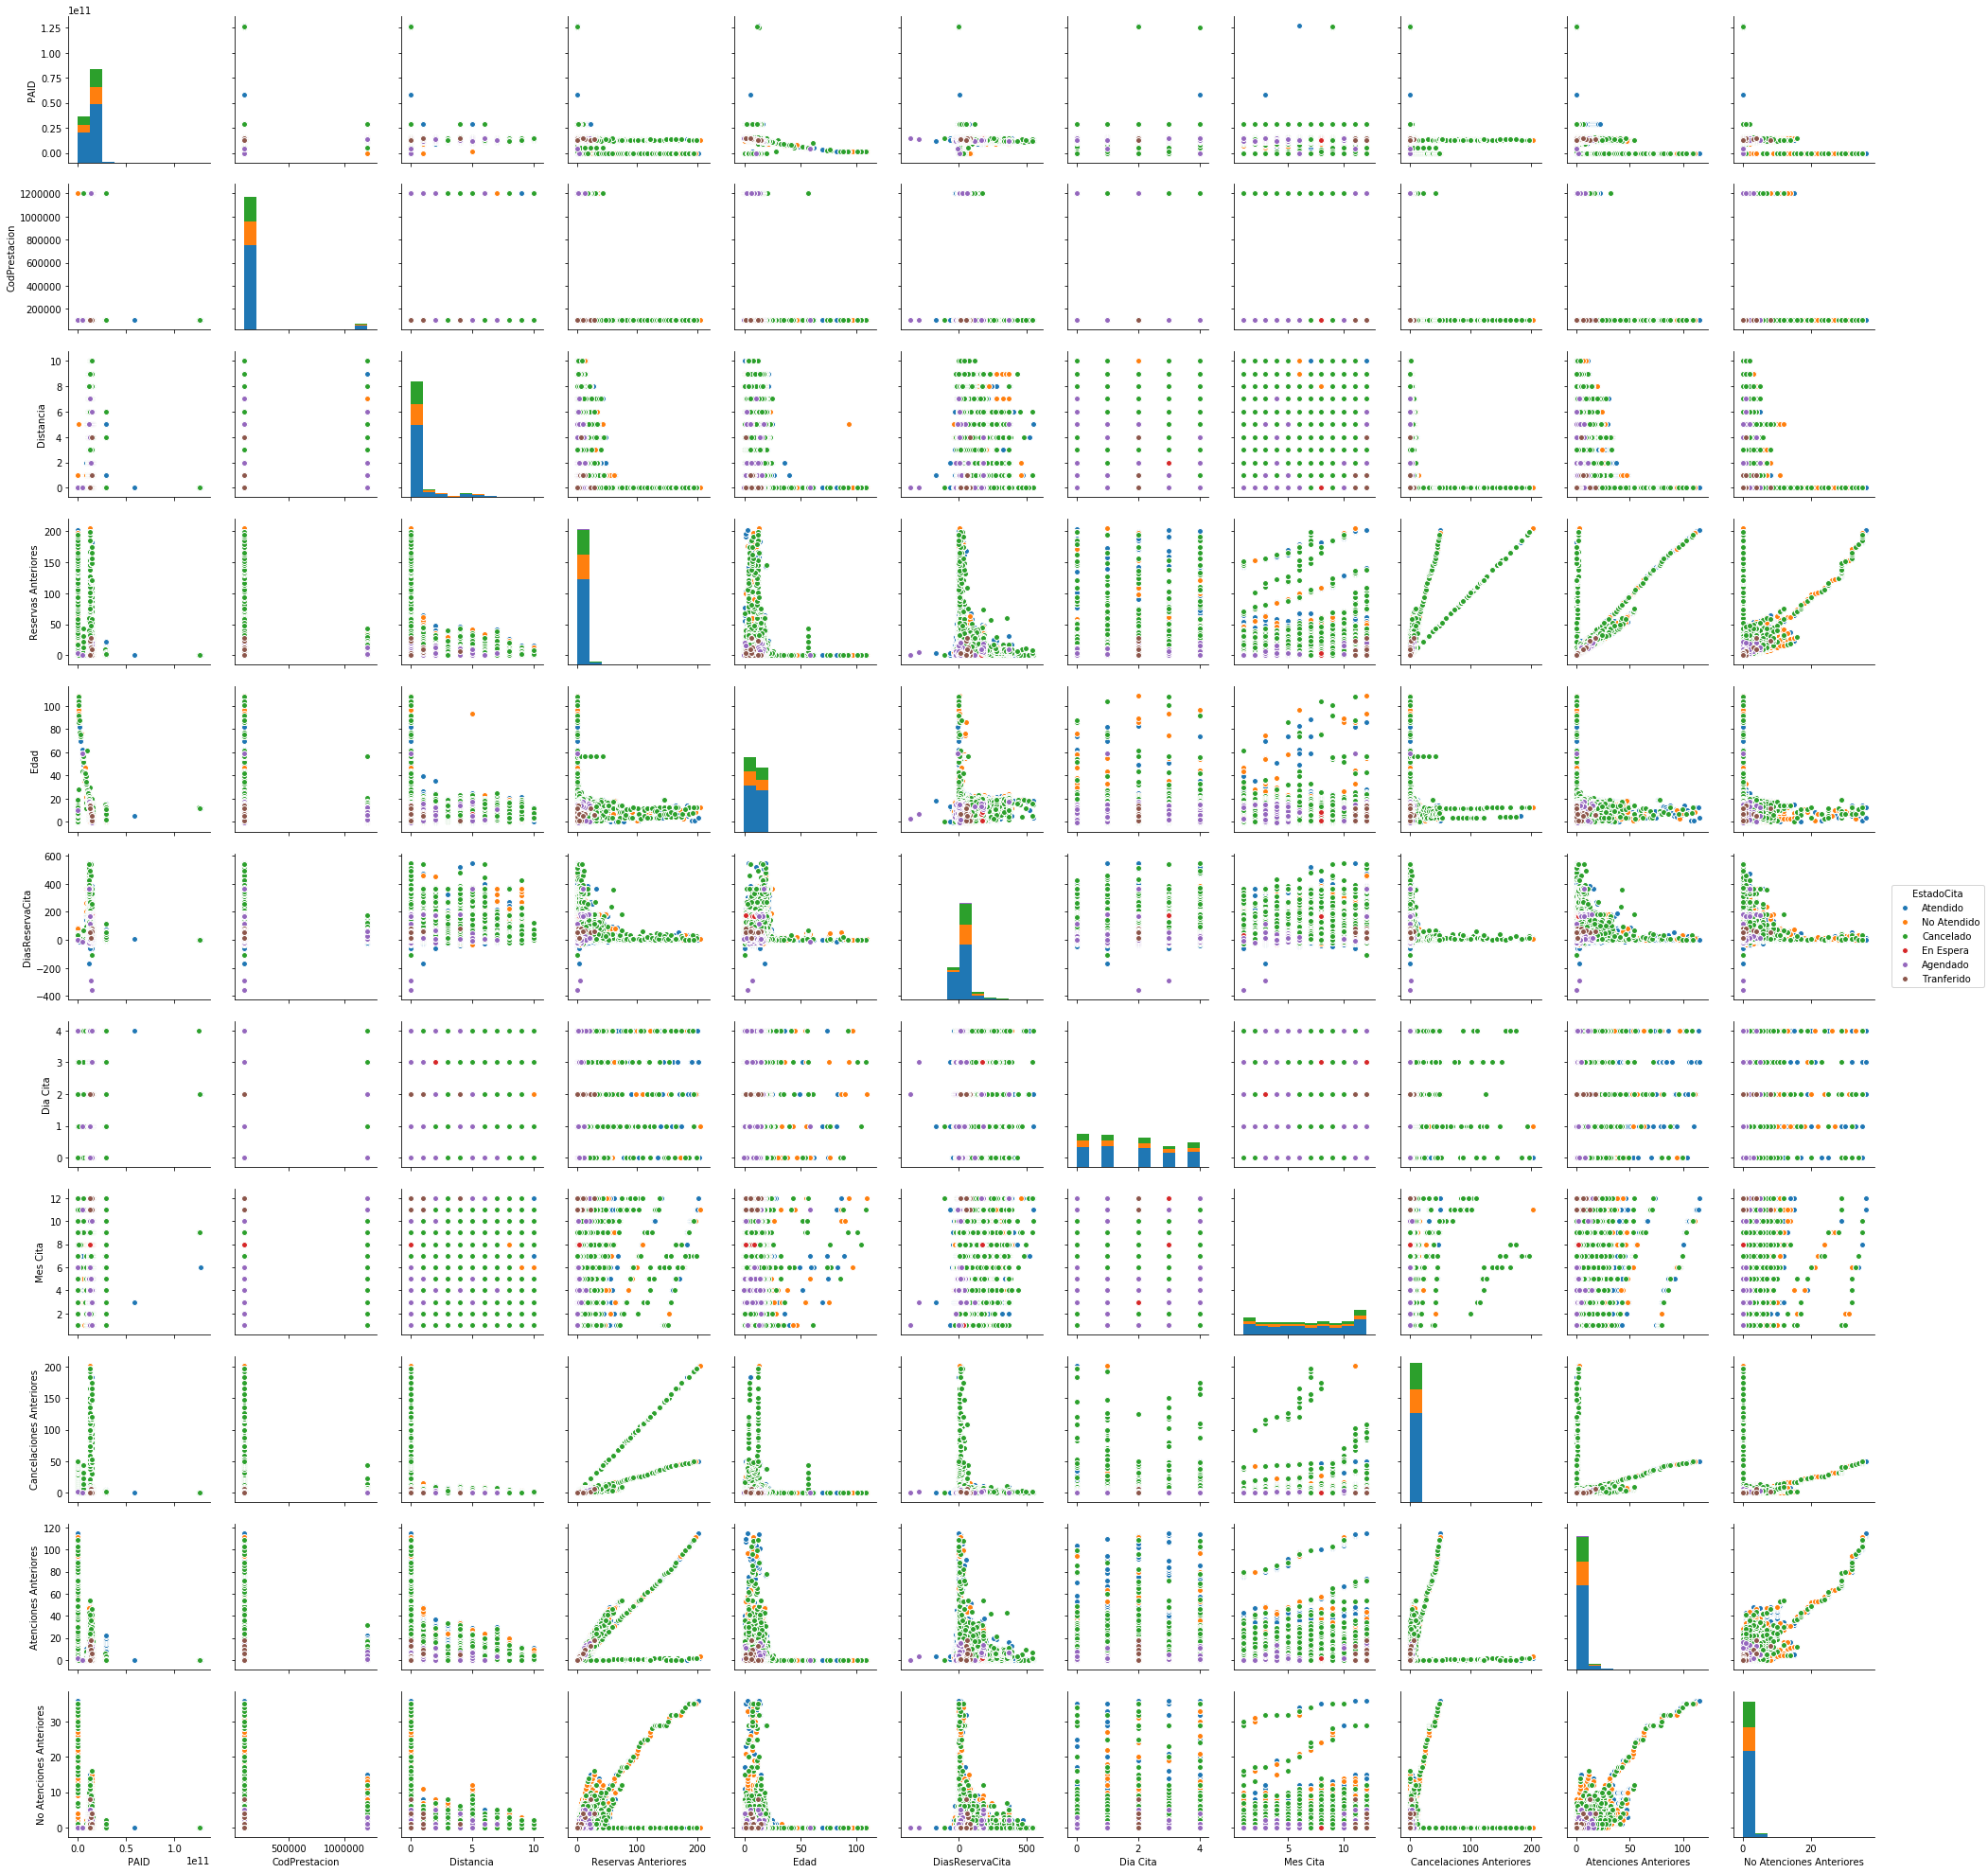

In [26]:
#Una visualización de la distribución de las variables
sns.pairplot(datos, hue="EstadoCita")

Procedemos ahora a hacer un leve análisis de la importancia de cada variable y de la posible eficacia de un tal predictor. Para esto creamos árboles de decisión con un criterio de entropía, los cuales son conocidos por sobre-aprender de la base de datos, pero son de rápido entrenamiento y nos indican qué nivel de información porta cada una de las variables con respecto al fenómeno:

In [27]:
#Encoder String -> Numérico
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


column_list = [] #str columns
for column in datos_final.columns:
    if datos_final[column].dtype == 'O':
        column_list.append(column)

datos_num = datos_final[column_list].astype(str).apply(le.fit_transform)
for column in datos_final.columns:
    if datos_final[column].dtype != 'O':
        datos_num[column] = datos_final[column]

In [28]:
#Árbol con las variables originales:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion']], datos_num['EstadoCita'])

clf.score(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 'TipoProfesional',
       'Especialidad', 'TipoAtencion', 'Prestacion']], datos_num['EstadoCita'])

0.63318298183591371

In [29]:
clf.feature_importances_

array([ 0.08720947,  0.29657488,  0.10865181,  0.05620149,  0.21089883,
        0.1207199 ,  0.03508568,  0.07695467,  0.00770328])

In [30]:
#Árbol con las variables nuevas:
clf.fit(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda',
                   'TipoProfesional','Especialidad', 'TipoAtencion', 'Prestacion','Edad',
                   'DiasReservaCita','Reservas Anteriores','Cancelaciones Anteriores','Atenciones Anteriores','No Atenciones Anteriores',
                   'Distancia', 'Dia Cita']], datos_num['EstadoCita'])

clf.score(datos_num[['Sexo', 'Comuna', 'Provincia', 'Region', 'Agenda', 
                     'TipoProfesional','Especialidad', 'TipoAtencion', 'Prestacion','Edad',
                     'DiasReservaCita','Reservas Anteriores','Cancelaciones Anteriores','Atenciones Anteriores','No Atenciones Anteriores',
                    'Distancia','Dia Cita']], datos_num['EstadoCita'])


0.99440042260961437

In [31]:
clf.feature_importances_

array([ 0.03585399,  0.11406871,  0.01862144,  0.01020212,  0.02815612,
        0.01025302,  0.00408738,  0.01346436,  0.00462828,  0.33840563,
        0.19048596,  0.05534581,  0.03901903,  0.0475979 ,  0.02694909,
        0.00765879,  0.05520238])